# How much has the US national debt changed under different presidents

Data source: [Treasury.gov Historical Debt Outstanding](https://fiscaldata.treasury.gov/datasets/historical-debt-outstanding/historical-debt-outstanding)

Another useful reference [here](https://www.thebalancemoney.com/national-debt-by-year-compared-to-gdp-and-major-events-3306287) listing significant events in different administrations.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HstDebt_17900101_20230930.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Record Date              235 non-null    object 
 1   Debt Outstanding Amount  235 non-null    float64
 2   Source Line Number       235 non-null    int64  
 3   Fiscal Year              235 non-null    int64  
 4   Fiscal Quarter Number    235 non-null    int64  
 5   Calendar Year            235 non-null    int64  
 6   Calendar Quarter Number  235 non-null    int64  
 7   Calendar Month Number    235 non-null    int64  
 8   Calendar Day Number      235 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 16.7+ KB


In [4]:
df.head()

,Record Date,Debt Outstanding Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-09-30,3.316733e+13,1,2023,4,2023,3,9,30
1,2022-09-30,3.092891e+13,1,2022,4,2022,3,9,30
2,2021-09-30,2.842892e+13,1,2021,4,2021,3,9,30
3,2020-09-30,2.694539e+13,1,2020,4,2020,3,9,30
4,2019-09-30,2.271940e+13,1,2019,4,2019,3,9,30


In [5]:
df = df[df['Fiscal Year'] >= 1950]

<Axes: xlabel='Fiscal Year'>

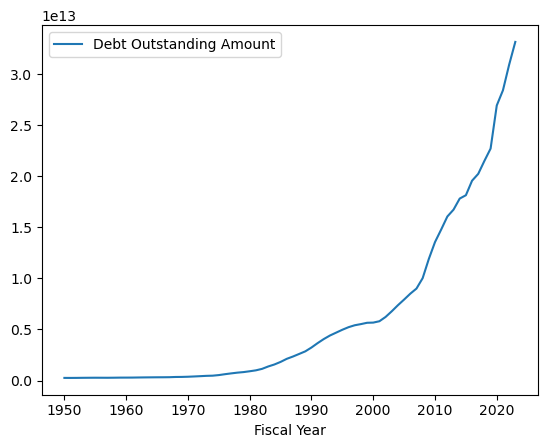

In [6]:
df.plot(x='Fiscal Year',y='Debt Outstanding Amount')

In [7]:
# Make a new column based on subtracting value in one row from previous row
df['Yearly Change'] = df['Debt Outstanding Amount'] - df['Debt Outstanding Amount'].shift(-1)

In [8]:
df.tail()

,Record Date,Debt Outstanding Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number,Yearly Change
69,1954-06-30,2.712596e+11,1,1954,3,1954,2,6,30,5.188537e+09
70,1953-06-30,2.660711e+11,1,1953,3,1953,2,6,30,6.965883e+09
71,1952-06-30,2.591052e+11,1,1952,3,1952,2,6,30,3.883202e+09
72,1951-06-29,2.552220e+11,1,1951,3,1951,2,6,29,-2.135376e+09
73,1950-06-30,2.573574e+11,1,1950,3,1950,2,6,30,NaN


<Axes: xlabel='Fiscal Year'>

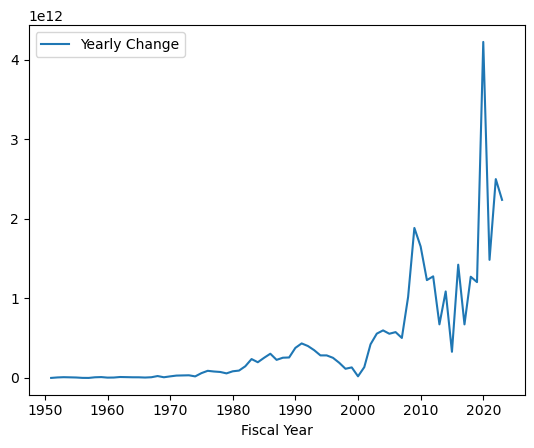

In [9]:
df.plot(x='Fiscal Year',y='Yearly Change')

In [10]:
# Filter data from 2000 onwards
df00 = df.query('`Fiscal Year` >= 2000')

In [11]:
# Export the processed data as a CSV
df00.to_csv('national-debt-2000-2023.csv',index=False)

In [12]:
import plotly.express as px

[Add vertical/horizontal shapes in Plotly](https://plotly.com/python/horizontal-vertical-shapes/)

In [13]:
px.bar(df00, x='Fiscal Year',y='Yearly Change')\
.add_vrect(x0=2021,x1=2024, fillcolor="blue", opacity=0.25, label=dict(text="Biden", font=dict(size=15)))\
.add_vrect(x0=2017,x1=2021, fillcolor="red", opacity=0.25, label=dict(text="Trump", font=dict(size=15)))\
.add_vrect(x0=2009,x1=2017, fillcolor="blue", opacity=0.25, label=dict(text="Obama", font=dict(size=15)))\
.add_vrect(x0=2001,x1=2009, fillcolor="red", opacity=0.25, label=dict(text="G.W. Bush", font=dict(size=15)))\
# .add_vline(x=2003, line_dash="dot",
#               annotation_text="Iraq war starts", 
#               annotation_position="top left",
#               annotation_font_size=12,
#               annotation_font_color="blue"
#              )\
# .add_vline(x=2007, line_dash="dot",
#               annotation_text="Great Recession begins", 
#               annotation_position="top left",
#               annotation_font_size=12,
#               annotation_font_color="blue"
#              )\
# .add_vline(x=2020, line_dash="dot",
#               annotation_text="First year of Covid19 pandemic", 
#               annotation_position="top left",
#               annotation_font_size=12,
#               annotation_font_color="blue"
#              )